In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

In [15]:
data = pd.read_csv('data.csv')

In [16]:
data.head()

,FL Round,DPL Target 0.10 - Alpha 0.4 - _step,DPL Target 0.10 - Alpha 0.4 - _step__MIN,DPL Target 0.10 - Alpha 0.4 - _step__MAX,DPL Target 0.10 - Alpha 0.4 - Lambda Client 0,DPL Target 0.10 - Alpha 0.4 - Lambda Client 0__MIN,DPL Target 0.10 - Alpha 0.4 - Lambda Client 0__MAX,DPL Target 0.10 - Alpha 0.4 - Lambda Client 1,DPL Target 0.10 - Alpha 0.4 - Lambda Client 1__MIN,DPL Target 0.10 - Alpha 0.4 - Lambda Client 1__MAX,...,DPL Target 0.10 - Alpha 0.4 - Lambda Client 96__MAX,DPL Target 0.10 - Alpha 0.4 - Lambda Client 97,DPL Target 0.10 - Alpha 0.4 - Lambda Client 97__MIN,DPL Target 0.10 - Alpha 0.4 - Lambda Client 97__MAX,DPL Target 0.10 - Alpha 0.4 - Lambda Client 98,DPL Target 0.10 - Alpha 0.4 - Lambda Client 98__MIN,DPL Target 0.10 - Alpha 0.4 - Lambda Client 98__MAX,DPL Target 0.10 - Alpha 0.4 - Lambda Client 99,DPL Target 0.10 - Alpha 0.4 - Lambda Client 99__MIN,DPL Target 0.10 - Alpha 0.4 - Lambda Client 99__MAX
0,1,10.5,6,15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2,41.5,32,51,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,3,82.5,68,97,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,4,133.5,114,153,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
4,5,194.5,170,219,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
columns = []
for column in data.columns:
    if "_step" not in column and "_MIN" not in column and "_MAX" not in column:
        columns.append(column)

len(columns)

101

In [5]:
data = data[columns]
for column in columns:
    data[column] = data[column].fillna(0)
    data[column] = data[column].astype(float)

In [6]:
# # sort the data by the name of the columns 
# data = data.reindex(sorted(data.columns), axis=1)

In [7]:

new_columns = []
for column in columns:
    column = column.replace("DPL Target 0.10 - Alpha 0.4 - Lambda Client", "")
    new_columns.append(column)

data.columns = new_columns

In [8]:
fl_round = data["FL Round"]
data.drop("FL Round", axis=1, inplace=True)

In [9]:
# Sort the data by the name of the columns
data.columns = data.columns.astype(int)
data.columns = sorted(data.columns)
new_columns = data.columns

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.027718,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.041225,0.101141,0.0,0.027718,0.0,...,0.0,0.149362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# convert the pandas dataframe to a np.array 
data = data.values
data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.80823372, 0.84618607, 0.92615409, ..., 0.63909071, 0.05467443,
        0.73006128],
       [0.80823372, 0.55169873, 0.83180841, ..., 0.63909071, 0.05467443,
        0.73006128],
       [0.80823372, 0.55169873, 0.83180841, ..., 0.63909071, 0.05467443,
        0.73006128]])

In [12]:
data = data.T

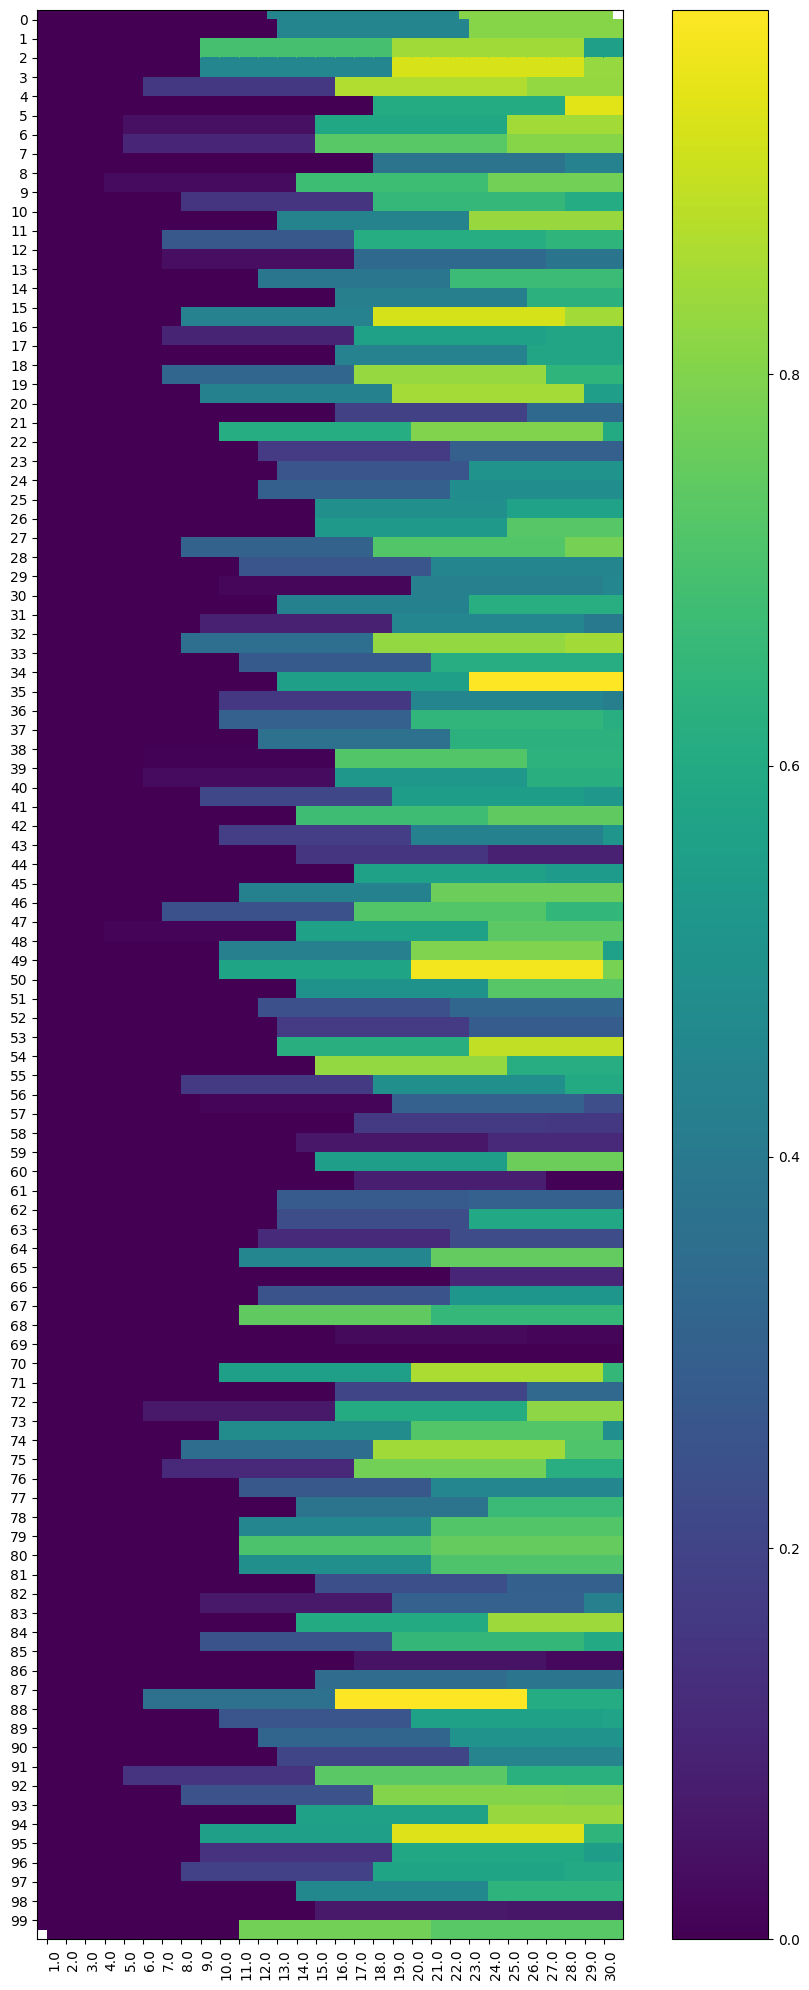

In [13]:

fig, ax = plt.subplots(figsize=(10, 20))
im = ax.imshow(data)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(fl_round)), labels=fl_round)
ax.set_yticks(np.arange(len(new_columns)), labels=new_columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
heatmap = plt.pcolor(data)
plt.colorbar(heatmap)


ax.set_title("")
fig.tight_layout()
plt.show()
